**Importing Libraries**

In [24]:
from apyori import apriori
import pandas as pd

**Reading and printing the CSV**

In [25]:
MAX_RULES = 8

dataframe = pd.read_csv('pizzaria.csv', sep = ';')
dataframe.head()

,dia,horario,tipo_de_encomenda,possui borda,refrigerante,valor,tempo_de_espera
0,sexta,inicio,buscar,nao,coca-cola,30-34,22-33
1,sexta,inicio,buscar,nao,coca-cola,30-34,33-44
2,sexta,inicio,buscar,nao,coca-cola,26-30,33-44
3,sexta,inicio,buscar,nao,coca-cola,30-34,33-44
4,sexta,inicio,buscar,nao,coca-cola,30-34,22-33


In [26]:
dataframe.shape

(2244, 7)

**Visualizing the data**

<AxesSubplot: xlabel='tempo_de_espera', ylabel='count'>

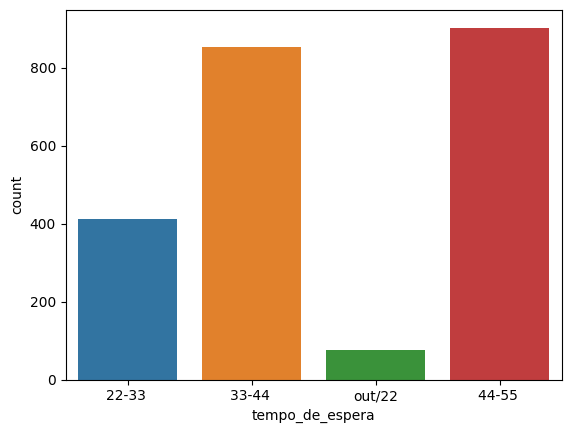

In [27]:
import seaborn as sns
sns.countplot(x = dataframe['tempo_de_espera'])

**Substituindo valor no formato de data**

<AxesSubplot: xlabel='tempo_de_espera', ylabel='count'>

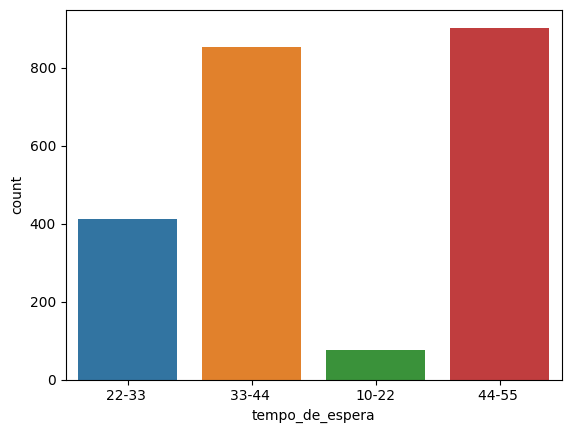

In [28]:
import numpy as np
dataframe.replace('out/22', '10-22', inplace = True) # inplace = True também altera na base, não só na memória
sns.countplot(x = dataframe['tempo_de_espera'])

**Colocando os valores num vetor de segunda dimensão - cada instância armazenada numa posição do vetor**

In [29]:
transacoes = []

for t in dataframe.values:
    transacoes.append([str(item) for item in t])
    
for x in range(5):
    print(transacoes[x])

['sexta', 'inicio', 'buscar', 'nao', 'coca-cola', ' 30-34', '22-33 ']
['sexta', 'inicio', 'buscar', 'nao', 'coca-cola', ' 30-34', '33-44 ']
['sexta', 'inicio', 'buscar', 'nao', 'coca-cola', ' 26-30', '33-44 ']
['sexta', 'inicio', 'buscar', 'nao', 'coca-cola', ' 30-34', '33-44 ']
['sexta', 'inicio', 'buscar', 'nao', 'coca-cola', ' 30-34', '22-33 ']


**Cada 'RelationRecord' ou 'frozenset' é uma regra**

In [30]:
# Dessa forma, não mostra um valor se relacionando com ele mesmo
apriori = apriori(transacoes, min_support=0.04, min_confidence=0.05, min_lift=1.5, min_length=2)
regras = list(apriori)
print(regras)

[RelationRecord(items=frozenset({'guarana', ' 34-38'}), support=0.05525846702317291, ordered_statistics=[OrderedStatistic(items_base=frozenset({' 34-38'}), items_add=frozenset({'guarana'}), confidence=0.32124352331606215, lift=1.815794625494316), OrderedStatistic(items_base=frozenset({'guarana'}), items_add=frozenset({' 34-38'}), confidence=0.3123425692695214, lift=1.815794625494316)]), RelationRecord(items=frozenset({'22-33 ', 'fim'}), support=0.05124777183600713, ordered_statistics=[OrderedStatistic(items_base=frozenset({'22-33 '}), items_add=frozenset({'fim'}), confidence=0.279126213592233, lift=1.5277054226852949), OrderedStatistic(items_base=frozenset({'fim'}), items_add=frozenset({'22-33 '}), confidence=0.28048780487804875, lift=1.5277054226852946)]), RelationRecord(items=frozenset({'buscar', 'coca-cola', ' 18-22'}), support=0.04679144385026738, ordered_statistics=[OrderedStatistic(items_base=frozenset({' 18-22'}), items_add=frozenset({'buscar', 'coca-cola'}), confidence=0.544041

In [31]:
print(regras[0])

RelationRecord(items=frozenset({'guarana', ' 34-38'}), support=0.05525846702317291, ordered_statistics=[OrderedStatistic(items_base=frozenset({' 34-38'}), items_add=frozenset({'guarana'}), confidence=0.32124352331606215, lift=1.815794625494316), OrderedStatistic(items_base=frozenset({'guarana'}), items_add=frozenset({' 34-38'}), confidence=0.3123425692695214, lift=1.815794625494316)])


**Total de regras**

In [32]:
numeroderegras = (len(regras))
numeroderegras

8

**Visualizando o resultado de forma tabular**

In [33]:
# putting output into a pandas dataframe
def inspect(regras):
    A         = [tuple(result[2][0][0])[0] for result in regras]
    B         = [tuple(result[2][0][1])[0] for result in regras]
    support    = [result[1] for result in regras]
    confidence = [result[2][0][2] for result in regras]
    lift       = [result[2][0][3] for result in regras]
    return list(zip(A, B, support, confidence, lift))

output_DataFrame = pd.DataFrame(inspect(regras), columns = ['A', 'B', 'Suporte', 'Confiança', 'Lift'])

**Mostrando os resultados desordenados**

In [34]:
output_DataFrame

,A,B,Suporte,Confiança,Lift
0,34-38,guarana,0.055258,0.321244,1.815795
1,22-33,fim,0.051248,0.279126,1.527705
2,18-22,buscar,0.046791,0.544041,1.514676
3,18-22,buscar,0.047237,0.549223,1.504830
4,30-34,sim,0.048128,0.171157,1.580560
5,34-38,guarana,0.052585,0.305699,1.916172
6,22-33,coca-cola,0.042781,0.233010,1.551554
7,18-22,buscar,0.046346,0.538860,1.742366


**Ordenação destas regras por uma métrica desejada**

In [35]:
output_DataFrame.nlargest(n = 8, columns = 'Confiança')

,A,B,Suporte,Confiança,Lift
3,18-22,buscar,0.047237,0.549223,1.504830
2,18-22,buscar,0.046791,0.544041,1.514676
7,18-22,buscar,0.046346,0.538860,1.742366
0,34-38,guarana,0.055258,0.321244,1.815795
5,34-38,guarana,0.052585,0.305699,1.916172
1,22-33,fim,0.051248,0.279126,1.527705
6,22-33,coca-cola,0.042781,0.233010,1.551554
4,30-34,sim,0.048128,0.171157,1.580560
